# Alexander Fabiano
# HW 5

## Topic: Dimensionality Reduction and Clustering

For this homework we will be using some image data! Specifically, the MNIST data set. You can load this data easily with the following commands:

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

### Assignment Description

The MNIST data set is hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Source: https://www.kaggle.com/c/digit-recognizer/data

For this homework, perform the following with the MNIST data:

1. Use PCA to reduce the dimensionality

    a. How many components did you use? Why?
    
    b. Plot the first two components. Do you notice any trends? What is this plot showing us?
    
    c. Why would you use PCA? What is it doing? And what are the drawbacks?
    
    d. Plot some of the images, then compress them using PCA and plot again. How does it look?
    
2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

    a. How does this plot differ from your PCA plot?
    
    b. How robust is it to changes in perplexity?
    
    c. How robust is it to different learning rate and number of iterations?
    
3. Perform k-means clustering:

    a. How did you choose k?
    
    b. How did you evaluate your clustering?
    
    c. Visualize your clusters using t-sne
    
    d. Did you scale your data?
    
    e. How robust is your clustering?
    
4. Perform hierarchical clustering:

    a. Plot your dendrogram
    
    b. How many clusters seem reasonable based off your graph?
    
    c. How does your dendrogram change with different linkage methods?

### Grading

This homework is due **March 22, 2018 by midnight Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* PCA - 20%
* T-SNE - 20%
* K-means - 20%
* Hierarchical Clustering - 20%

**Import Statements**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline
from sklearn.decomposition import PCA

## 1. Principle Component Analysis 

Insert description of PCA here:

In [70]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 784)


In [73]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


### a. How many components did you use? Why?

I chose to use 154 components. While this number may seem arbitrary, I want my model to explain at least 95% of the variance in the data, so I found the minimum number of components whose cumulative sum is greater than or equal to 0.95.

Text(0.5,1,'Cumulative Sum of Explained Variance')

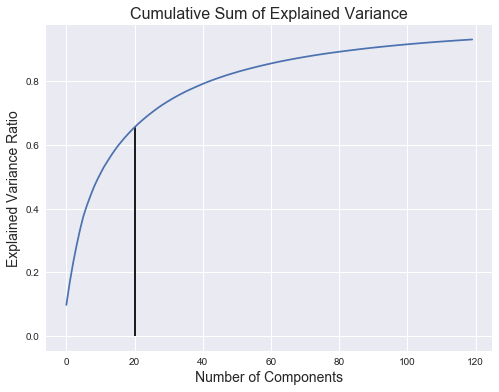

In [67]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[20],x=20)
plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Explained Variance Ratio", fontsize=14)
plt.title("Cumulative Sum of Explained Variance", fontsize=16)

In [37]:
index_75 = np.argmax(cum_ratio >= 0.75)
print(index_75)
print(cum_ratio[index_75])

32
0.750656642896


### b. Plot the first two components. Do you notice any trends? What is this plot showing us?

Text(0.5,1,'PCA 1 & 2')

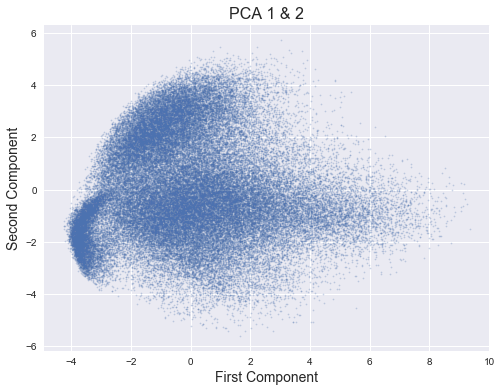

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1], alpha=.25, marker='h', s=2)
plt.xlabel("First Component", fontsize=14)
plt.ylabel("Second Component", fontsize=14)
plt.title("PCA 1 & 2", fontsize=16)

answer question above...

### c. Why would you use PCA? What is it doing? And what are the drawbacks?

### d. Plot some of the images, then compress them using PCA and plot again. How does it look?

## 2. T-Distributed Stochastic Neighbor Embedding (T-SNE)